In [1]:
from keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data();
x_train.shape

Using TensorFlow backend.


(60000, 28, 28)

In [2]:
from keras import backend as k
k.image_data_format()

'channels_last'

In [3]:
x_train = x_train.astype('float32')
x_train /= 255
x_train.shape

(60000, 28, 28)

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_train.shape

(60000, 28, 28, 1)

In [5]:
import keras

y_train_onehot = keras.utils.to_categorical(y_train, num_classes=10)
y_train_onehot[0:3, :]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=4, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
train_history = model.fit(x=x_train, y=y_train_onehot, batch_size=100, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 20s 325us/step - loss: 1.1669 - acc: 0.6625
Epoch 2/10
60000/60000 [==============================] - 20s 333us/step - loss: 0.2755 - acc: 0.91841s - loss: 0.27
Epoch 3/10
60000/60000 [==============================] - 20s 329us/step - loss: 0.1988 - acc: 0.94041s - loss
Epoch 4/10
60000/60000 [==============================] - 20s 328us/step - loss: 0.1602 - acc: 0.9522
Epoch 5/10
60000/60000 [==============================] - 20s 328us/step - loss: 0.1354 - acc: 0.9593
Epoch 6/10
60000/60000 [==============================] - 20s 328us/step - loss: 0.1189 - acc: 0.9643
Epoch 7/10
60000/60000 [==============================] - 20s 329us/step - loss: 0.1063 - acc: 0.9679
Epoch 8/10
60000/60000 [==============================] - 20s 329us/step - loss: 0.0974 - acc: 0.9700
Epoch 9/10
60000/60000 [==============================] - 20s 330us/step - loss: 0.0899 - acc: 0.9725
Epoch 10/10
60000/60000 [==============================] -

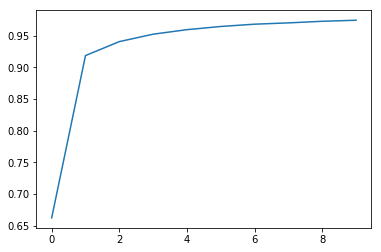

In [10]:
import matplotlib.pyplot as plt
plt.plot(train_history.history['acc'])
plt.show()